In [24]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.animation
import imageio

In [44]:
width = 50
height = 50
initProb = 0.4

In [52]:
def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = 1
            else:
                state = 0
            config[y, x] = state

    nextConfig = zeros([height, width])

def observe():
    #fig,ax=plt.subplots()
    ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    plt.axis('image')
    plt.title('t = ' + str(time))
    plt.show()
    

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            numberOfAlive = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    numberOfAlive += config[(y+dy)%height, (x+dx)%width]
            if state == 0 and numberOfAlive == 3:
                state = 1
            elif state == 1 and (numberOfAlive < 3 or numberOfAlive > 4):
                state = 0
            nextConfig[y, x] = state
    config, nextConfig = nextConfig, config


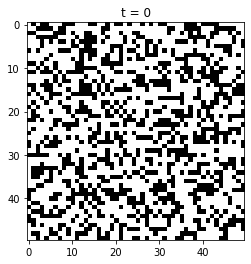

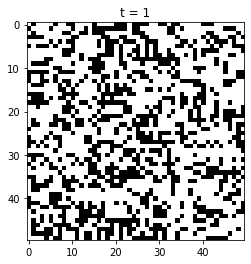

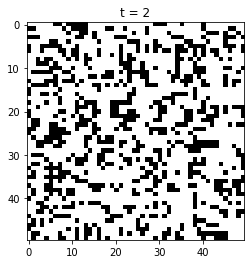

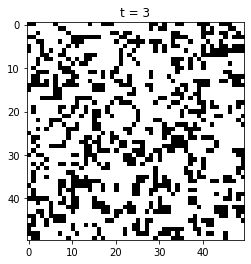

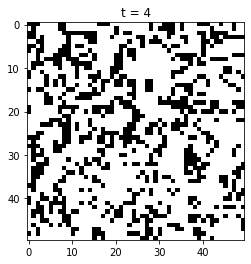

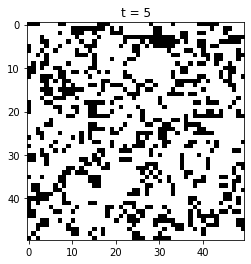

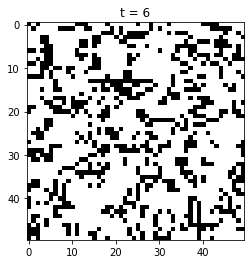

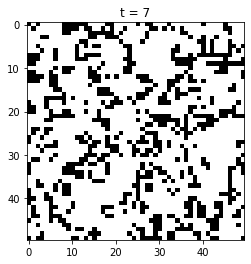

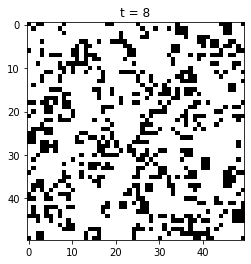

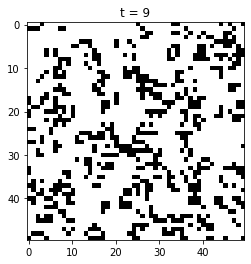

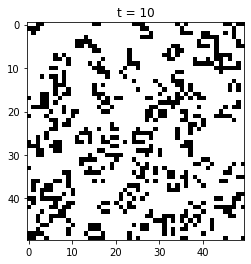

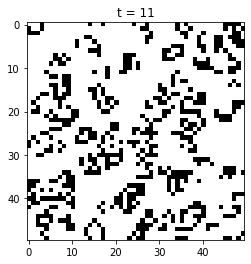

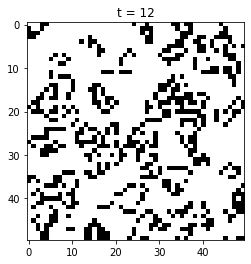

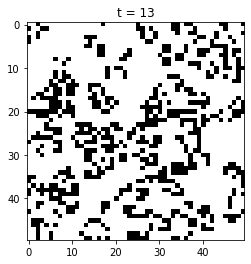

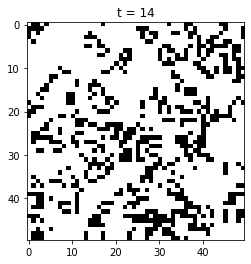

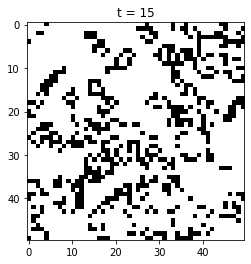

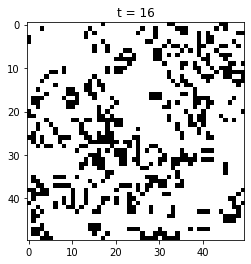

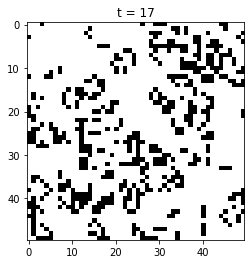

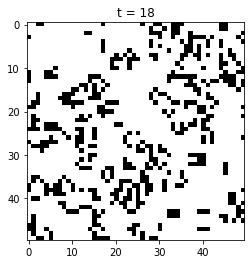

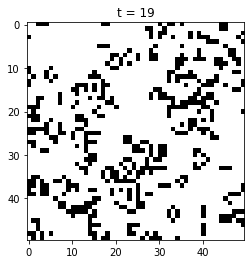

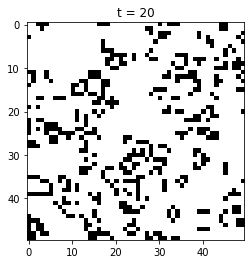

In [50]:
initialize()

observe()
for i in range(20):
    update()
    observe()

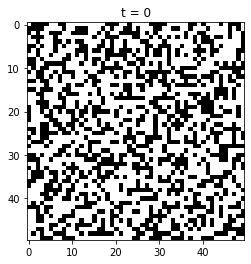

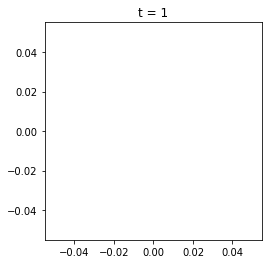

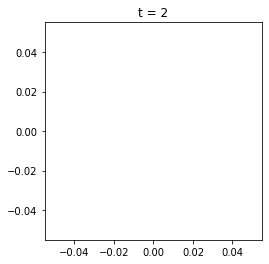

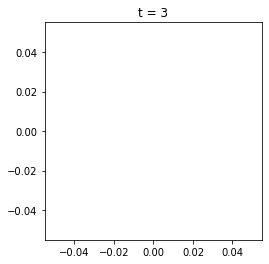

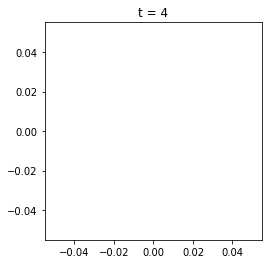

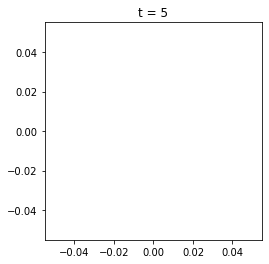

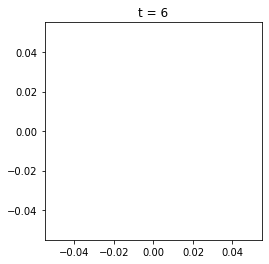

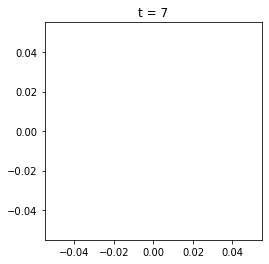

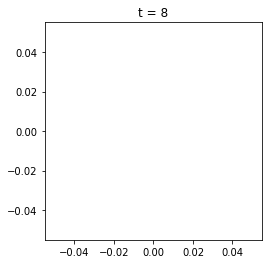

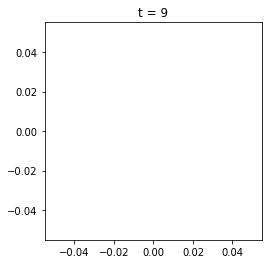

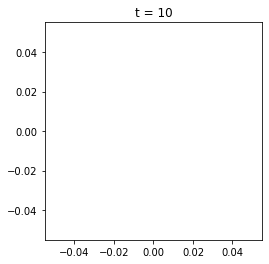

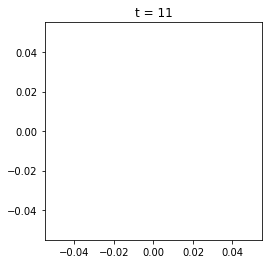

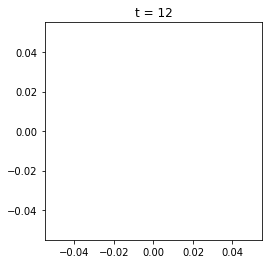

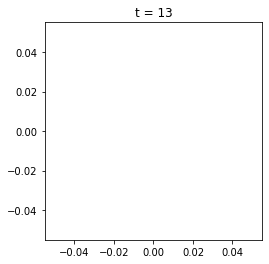

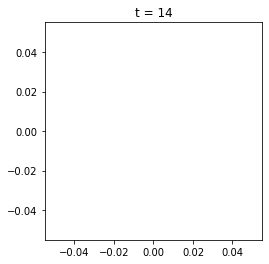

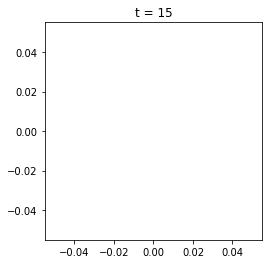

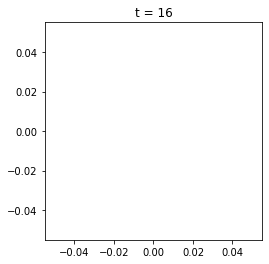

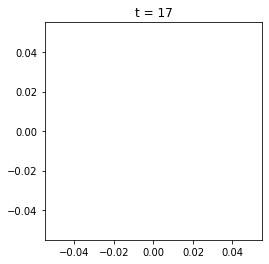

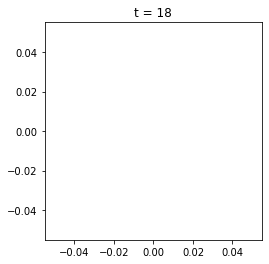

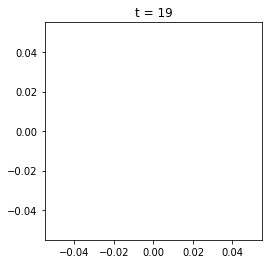

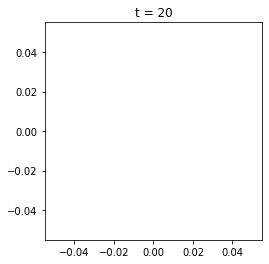

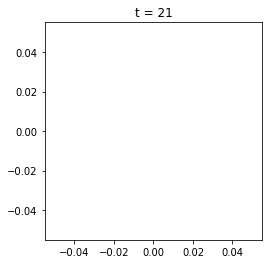

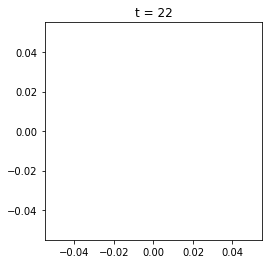

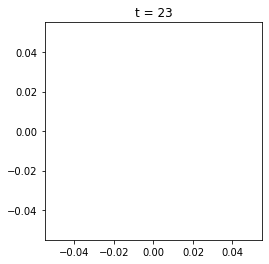

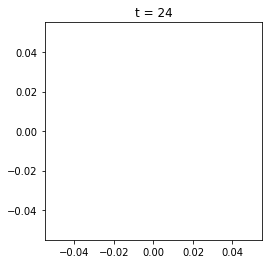

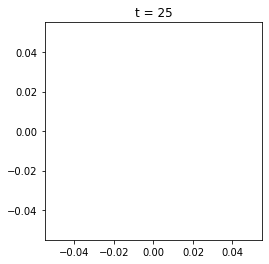

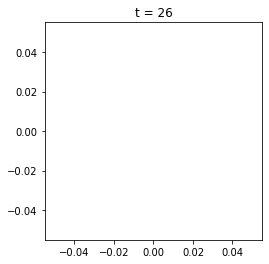

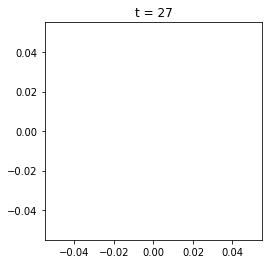

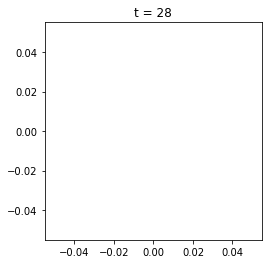

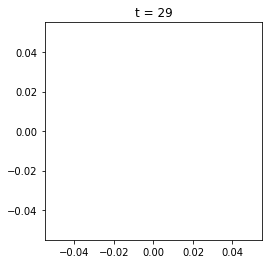

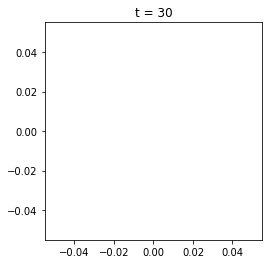

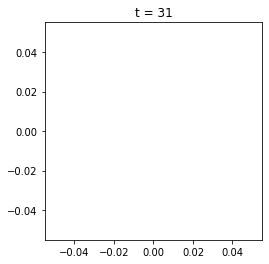

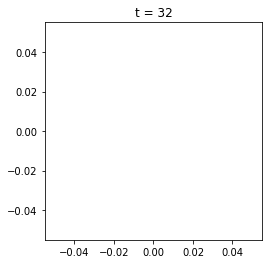

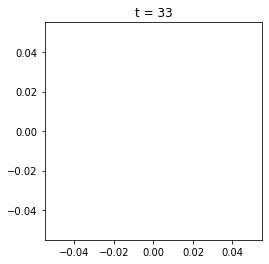

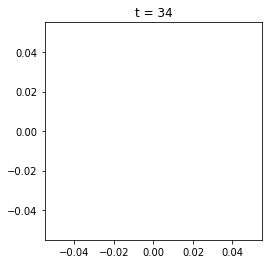

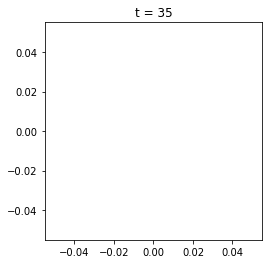

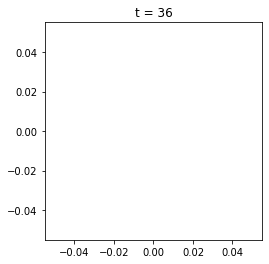

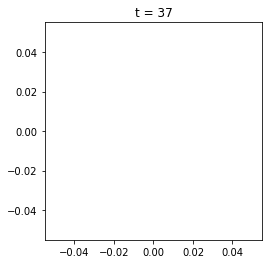

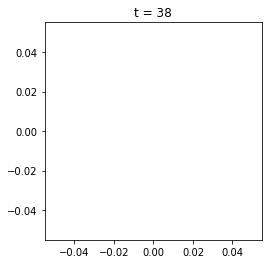

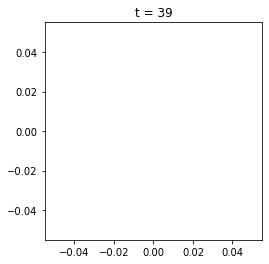

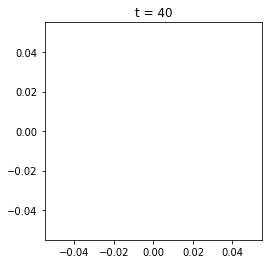

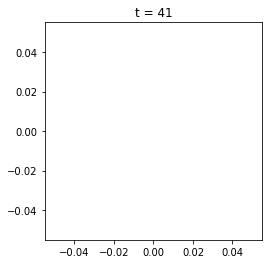

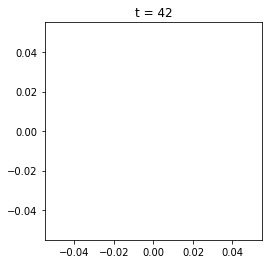

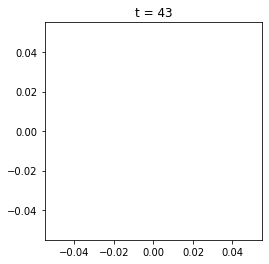

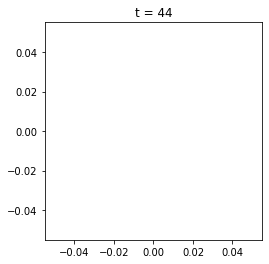

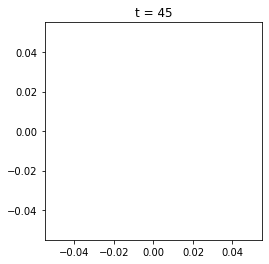

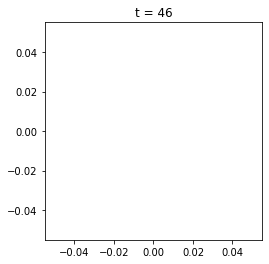

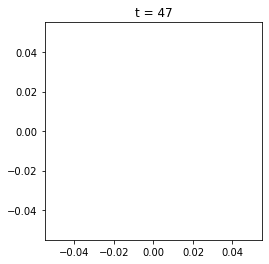

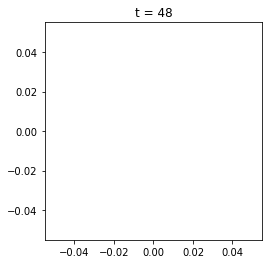

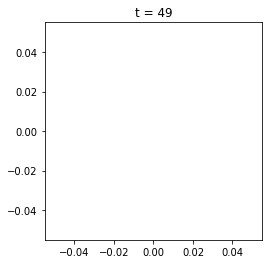

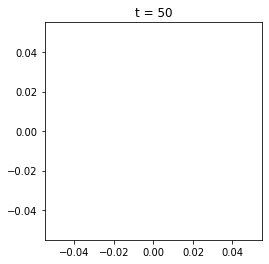

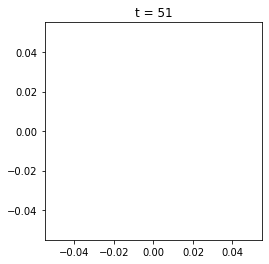

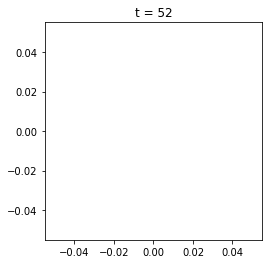

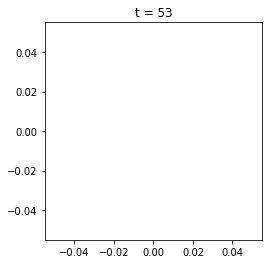

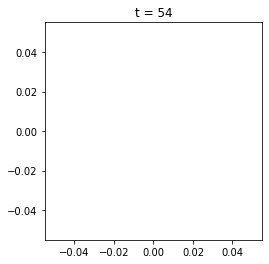

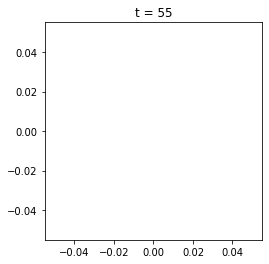

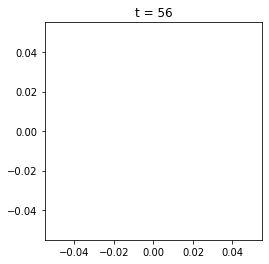

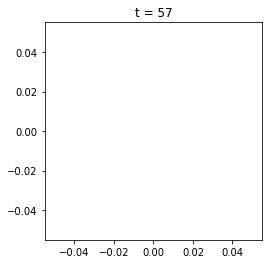

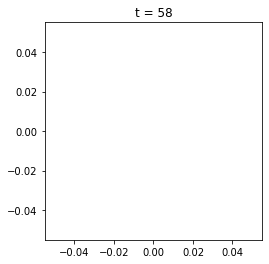

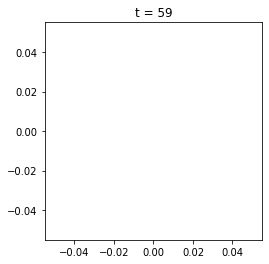

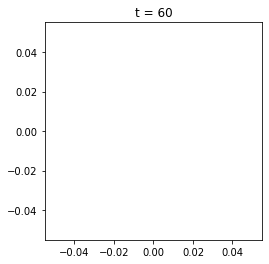

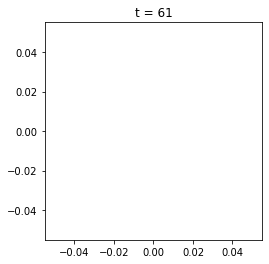

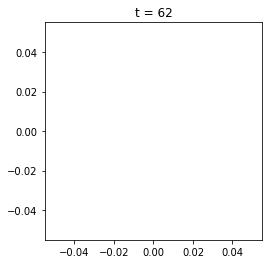

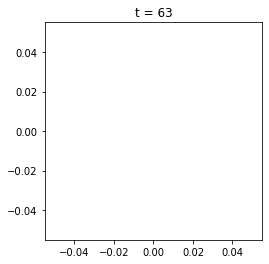

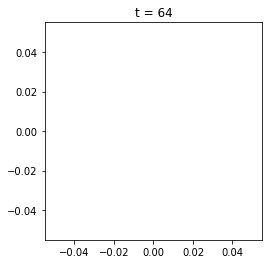

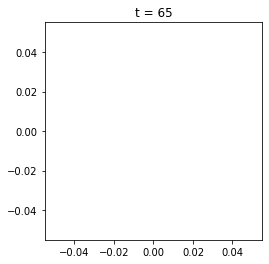

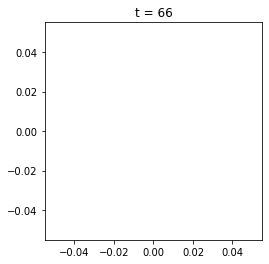

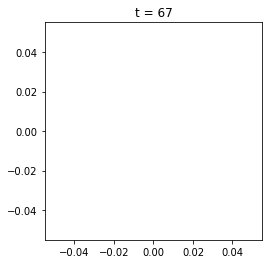

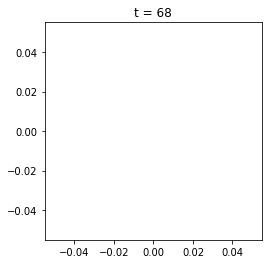

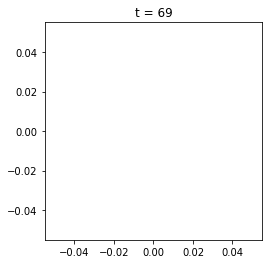

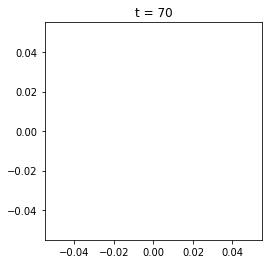

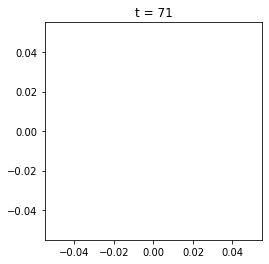

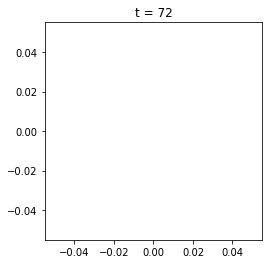

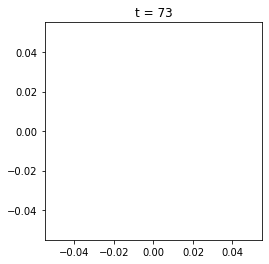

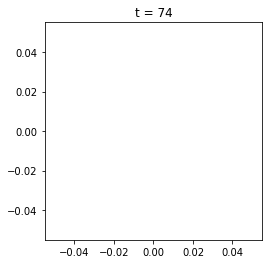

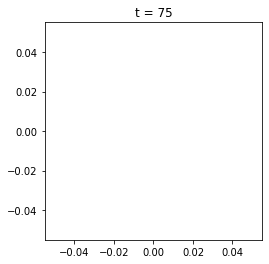

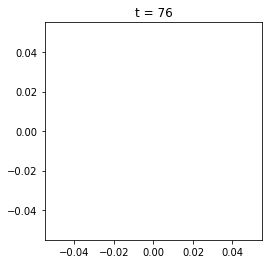

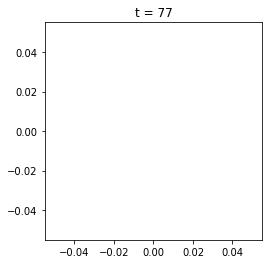

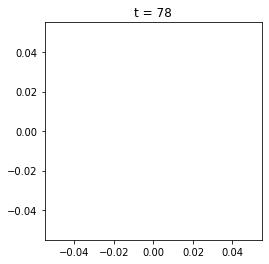

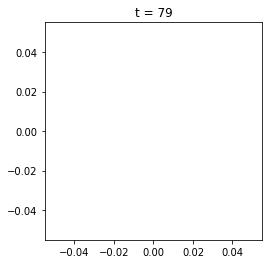

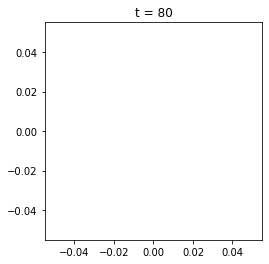

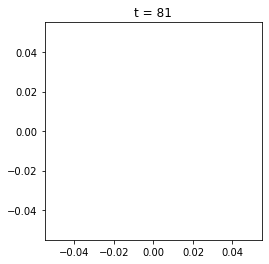

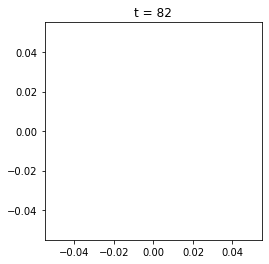

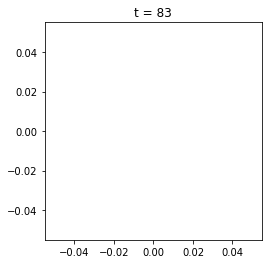

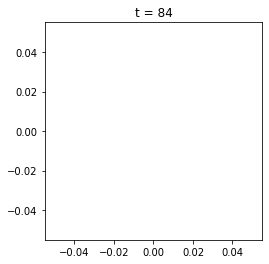

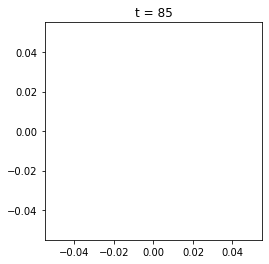

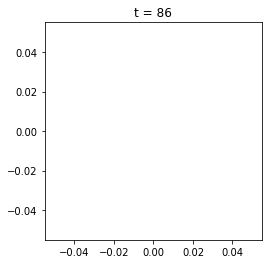

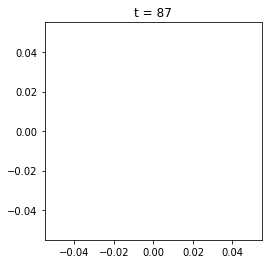

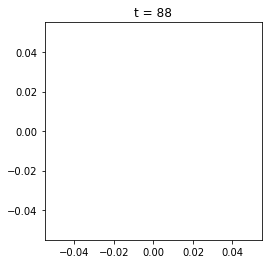

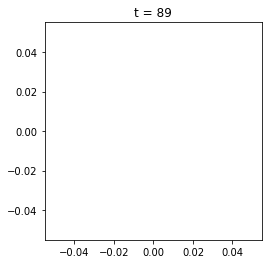

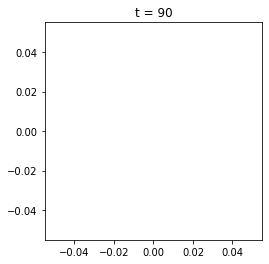

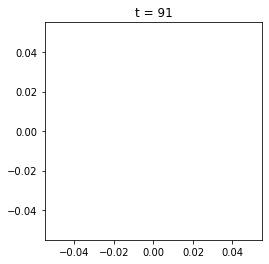

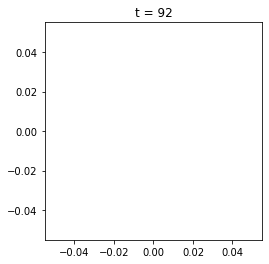

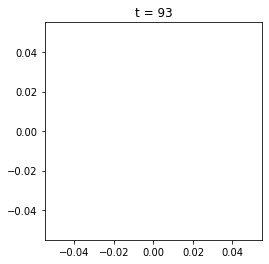

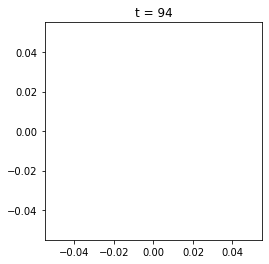

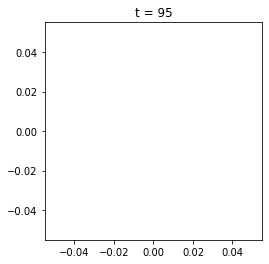

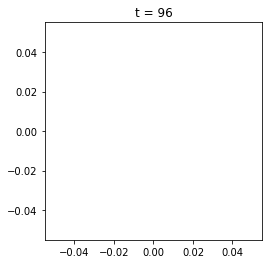

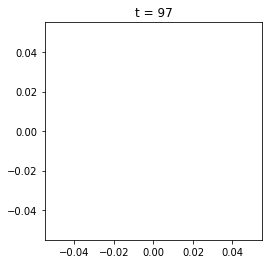

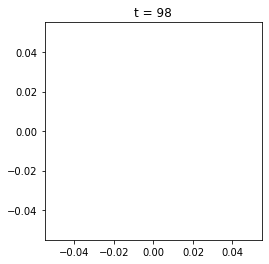

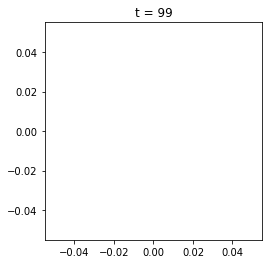

<Figure size 432x288 with 0 Axes>

In [53]:
%matplotlib inline
initialize()
img=[]
fig,ax=plt.subplots()
for i in range(100):
    #plt.cla()
    
    #ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    #plt.title('t = ' + str(i))
    #plt.show()
    observe()
    plt.savefig(f'./FIG5/{i}.png')
    image=imageio.v2.imread(f'./FIG5/{i}.png')
    img.append(image)
    #plt.cla()
    update()
imageio.mimsave('./FIG5/vida.gif',img,duration=100,loop=100)
#ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

In [23]:
ims[0]


<IPython.core.display.Javascript object>


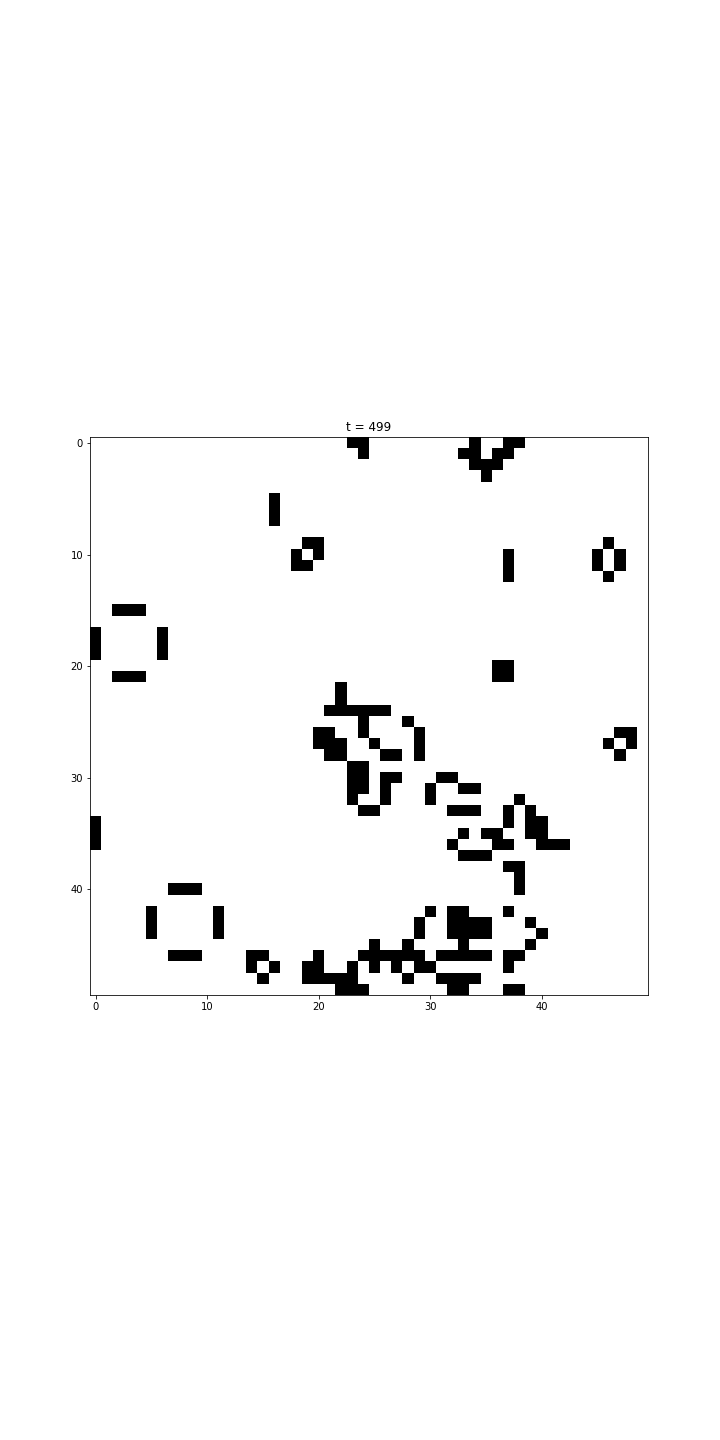

In [58]:
%matplotlib notebook

initialize()
ims=[]
fig,ax=plt.subplots(figsize=(10,20))
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

In [67]:
width = 100
height = 100
initProb = 0.5
maxState =5

def initialize():
    global time, config, nextConfig
    
    time = 0

    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = maxState
            else:
                state = 0
            config[y, x] = state

    nextConfig = zeros([height, width])

def observe():
    cla()
    imshow(config, vmin = 0, vmax = maxState, cmap = cm.binary)
    axis('image')
    title('t = ' + str(time))

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                num = 0
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == maxState:
                            num += 1
                if random.random() * 3 < num:
                    state = maxState
                else:
                    state = 0
            else:
                state -= 1
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


<IPython.core.display.Javascript object>


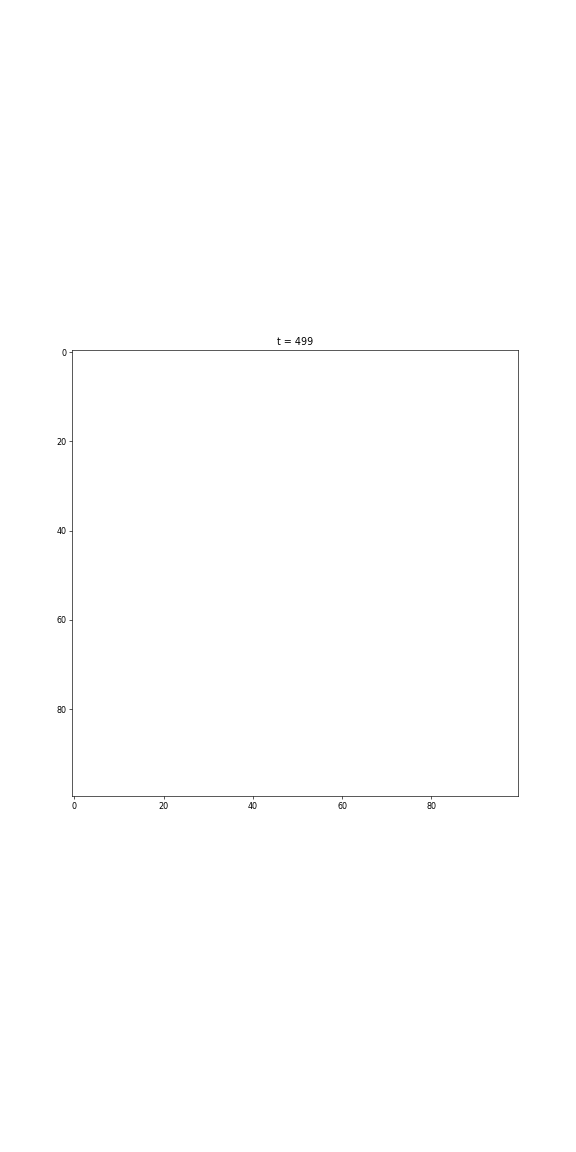

In [68]:

initialize()
ims=[]
fig,ax=plt.subplots(figsize=(10,20))
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

In [72]:
width = 50
height = 50
initProb = 0.01
infectionRate = 0.85
regrowthRate = 0.15

def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = zeros([height, width])

def observe():
    cla()
    imshow(config, vmin = 0, vmax = 2, cmap = 'jet')
    axis('image')
    title('t = ' + str(time))

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if random.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if random.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


<IPython.core.display.Javascript object>


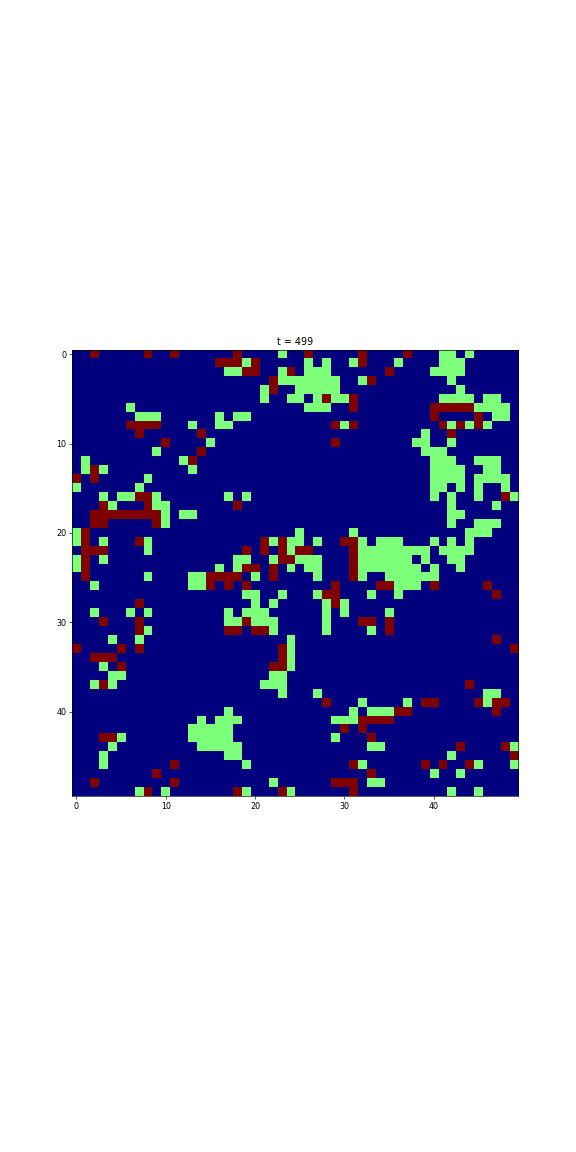

In [73]:
initialize()
ims=[]
fig,ax=plt.subplots(figsize=(10,20))
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 2, cmap = 'jet',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 2, cmap = 'jet',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)